# Tarea 2
## Francisco Javier Peralta Ramírez

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

import warnings
sp.init_printing()
warnings.filterwarnings('ignore')

In [2]:
def adam(f, gradf, x0, nIter, alpha):
    pass

In [100]:
def nag(f, gradf, x0, nIter, alpha, eta):
    assert alpha > 0 and eta > 0#positive step size
    a, e, x = alpha, eta, x0
    #primer paso es desenso de gradiente...
    p = gradf(x)
    fx = [f(x)]
    x = x - a * p
    #empieza NAG
    fx.append(f(x))
    for i in range(nIter - 1): #ya hicimos la primera iteracion...
        xn = x - a * p #tomamos el paso anterior
        gt = gradf(xn)
        p = e * p + gt #nueva dir
        x = xn - a * p
        fx.append(f(x))
    return np.array(fx)

In [101]:
def adagrad(f, gradf, x0, nIter, alpha, epsilon = 0.001):
    x = x0
    g2 = np.zeros_like(x)
    fx = [f(x)]
    for i in range(nIter):
        g = gradf(x)
        g2 += g**2 #suma cuadrada de gradientes
        n = alpha / np.sqrt(g2 + epsilon)
        x = x - n * g
        fx.append(f(x))
    return np.array(fx)

Codificamos la función rosembrock como un simple **for**

In [37]:
def rosenbrock(x):
    fx = 0
    for i in range(len(x) - 1):
        fx += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return fx

Como la función *rosenbrock* admite cualquier tipo (i.e. no se hace chequeo de tipos) podemos pasar simbolos de *sympy*

In [38]:
x = sp.symbols('x1:3')
rosenbrock(x)

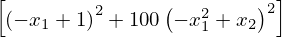

In [39]:
ros = sp.Matrix([rosenbrock(x)])
ros

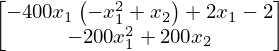

In [40]:
jacRos = ros.jacobian(x).T
jacRos

Podemos evaluar el resultado del gradiente usando la función **subs** la cual substituye las variables por valores, esta requiere un parámetro de la forma ***[ (old, new), ... ]*** donde *old* es la variable a remplazar y *new* el valor.

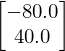

In [41]:
x0 = [1, 1.2]
evalJ = jacRos.subs([(x[i], x0[i]) for i in range(len(x0))])
evalJ

Podemos juntar todo esto para crear una función que regresa el gradiente

In [42]:
def sym_grad(f, x):
    x_s = sp.symbols('x0:{}'.format(len(x)))
    mtx = sp.Matrix([f(x_s)])
    jac = mtx.jacobian(x_s)
    evl = jac.subs([(x_s[i], x[i]) for i in range(len(x0))])
    return np.array( [float(v) for v in evl])
sym_grad(rosenbrock, x0) #comprobamos funcionamiento

def sym_grad_batch(f, x, syms):
    pass

array([-80.,  40.])

In [43]:
def rosenbrock_grad(x):
    return sym_grad(rosenbrock, x) 

In [103]:
nag(rosenbrock, rosenbrock_grad, x0, 10, 0.001, 0.2)

array([4.        , 0.010496  , 0.01519294, 0.1931574 , 0.01465906,
       0.05045281, 0.01124561, 0.01510121, 0.00710525, 0.00702112,
       0.00520279])

In [104]:
adagrad(rosenbrock, rosenbrock_grad, x0, 10, 0.1)

array([4.        , 1.21999893, 0.24952355, 0.03511411, 0.00849597,
       0.00468432, 0.00416825, 0.00409292, 0.00407812, 0.00407154,
       0.00406609])

In [92]:
def adam(f, gradf, x0, nIter, alpha, epsilon = 0.001):
    pass